Week 8 - 18th June 2024 - Advanced Python AI and ML Tools

### Discretization
- transform continuous variables into a descrete form
- we do this when we have reason to believe that a numerical feature shoud behave more like a categorical value

In [1]:
import numpy as np

In [2]:
from sklearn.preprocessing import Binarizer
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
binarizer = Binarizer(threshold=18)
binarizer.fit_transform(age)

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1]])

Note : Visit :Recursive Feature Elimination


# numPy's Digitize
- below 20 is bin 0
- between 20 and 30 is bin 1
- between 30 and 64 is bin 2
- more than 64 is bin 3

In [3]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
np.digitize(age, bins = [20,30,64])

array([[0],
       [0],
       [0],
       [1],
       [2],
       [3]], dtype=int64)

In [4]:
age = np.array([[6],
                [12],
                [18],
                [20],
                [36],
                [65]
                ])
np.digitize(age, bins = [20,30,70])

array([[0],
       [0],
       [0],
       [1],
       [2],
       [2]], dtype=int64)

# Cluster Observations

In [5]:
import pandas as pd 
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

In [6]:
clusterer = KMeans(3, random_state=0)

In [7]:
features, original_class = make_blobs(n_samples=50,
                                      n_features=2,
                                      centers=3,
                                      random_state=1)

In [8]:
clusterer.fit(features)

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [9]:
dataframe = pd.DataFrame(features, columns=["feature_1","feature_2"])

In [10]:
dataframe["group"] = clusterer.predict(features)

In [11]:
dataframe["original_class"] = original_class

In [12]:
dataframe.head()

,feature_1,feature_2,group,original_class
0,-9.877554,-3.336145,2,1
1,-7.287210,-8.353986,0,2
2,-6.943061,-7.023744,0,2
3,-7.440167,-8.791959,0,2
4,-6.641388,-8.075888,0,2


In [13]:
pd.crosstab(dataframe["group"],dataframe["original_class"],margins=True,margins_name="Total")

original_class,0,1,2,Total
group,,,,
0,0,1,16,17
1,17,0,0,17
2,0,16,0,16
Total,17,17,16,50


In [14]:
df = pd.read_csv("Practice_File.csv", usecols=["LotArea","SalePrice"])

In [15]:
df.head()

,LotArea,SalePrice
0,8450,208500
1,9600,181500
2,11250,223500
3,9550,140000
4,14260,250000


In [16]:
from sklearn.model_selection import train_test_split

In [17]:
train, test = train_test_split(df,train_size=0.8)

e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=5.
  warnings.warn(
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
e:\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid i

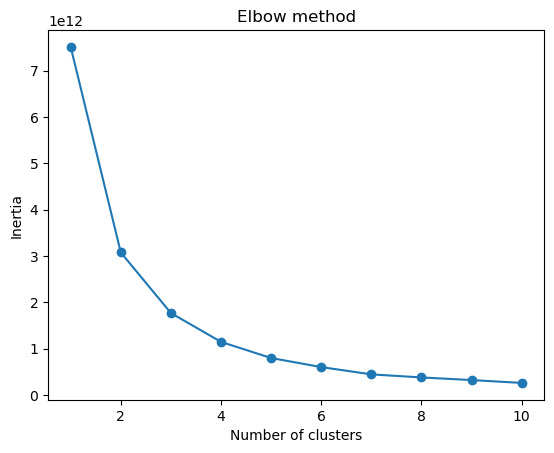

In [18]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#data = list(zip(df["LotArea"],df["SalePrice"]))
inertias = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(train)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [19]:
# #kmeans = KMeans(n_clusters=3)
# kmeans = KMeans(n_clusters=3).fit(train)
# #kmeans.fit(train)

# plt.scatter(df.LotArea, df.SalePrice, c=kmeans.predict(test))
# plt.show()

# Missing Values

## Predicting missing values

In [20]:
from sklearn.impute import KNNImputer

In [21]:
X = [[1,2,np.nan],[3,4,3],[np.nan,6,5],[8,8,7]]
imputer = KNNImputer(n_neighbors=2)

In [22]:
imputer.fit_transform(X)

array([[1. , 2. , 4. ],
       [3. , 4. , 3. ],
       [5.5, 6. , 5. ],
       [8. , 8. , 7. ]])

## Filling missing values

In [23]:
from sklearn.impute import SimpleImputer


In [24]:
imp_mean = SimpleImputer(missing_values=np.nan, strategy="mean")
imp_mean.fit([[7,2,3],[4,np.nan,6],[10,5,9]])
SimpleImputer()

SimpleImputer()

In [25]:
X = [[np.nan,2,3],[4,np.nan,6],[10,np.nan,9]]
print(imp_mean.transform(X))

[[ 7.   2.   3. ]
 [ 4.   3.5  6. ]
 [10.   3.5  9. ]]


# Encode nominal categorical values

## Nominal variables

In [27]:

from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit_transform(["yes","no","no","yes","lol"])

array([[0, 0, 1],
       [0, 1, 0],
       [0, 1, 0],
       [0, 0, 1],
       [1, 0, 0]])

In [28]:
lb.classes_

array(['lol', 'no', 'yes'], dtype='<U3')

In [29]:
le = preprocessing.LabelEncoder()
le.fit_transform(["yes","no","no","yes","lol"])

array([2, 1, 1, 2, 0], dtype=int64)

target encoder

In [30]:
df = pd.DataFrame({"X" : ["a","b","a"],"Y":["B","A","C"],"Z":[1,2,3]})
df

,X,Y,Z
0,a,B,1
1,b,A,2
2,a,C,3


In [31]:
pd.get_dummies(df,prefix=["colX","colY"])

,Z,colX_a,colX_b,colY_A,colY_B,colY_C
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


## Ordinal variables

In [33]:
dataframe = pd.DataFrame({"Score":["Low","Low","Medium","Medium","High","Barely More Than Medium"]})

In [34]:
scale_mapper = {"Low":1,
                "Medium":2,
                "Barely More Than Medium":3,
                "High":4}

In [35]:
dataframe["Score"].replace(scale_mapper)

0    1
1    1
2    2
3    2
4    4
5    3
Name: Score, dtype: int64